In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df1 = pd.read_csv('future_homes_v2.csv')
x=df1.drop('Price',axis=1)
y=df1['Price']

In [8]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x.columns)

In [10]:
from sklearn.linear_model import LinearRegression
multi_model = LinearRegression()
multi_model.fit(x_train_scaled, y_train)
y_pred =multi_model.predict(x_test_scaled)

In [11]:
coeffs = pd.DataFrame(
    multi_model.coef_,
    x.columns,
    columns=['Coefficient']
)

In [12]:
print("Feature Importance (Coefficients):")
print(coeffs)

Feature Importance (Coefficients):
                   Coefficient
Area_SqFt         73491.671862
Bedrooms          14924.933527
House_Age          1302.271359
Distance_to_City -10650.661911
School_Rating      1036.252340


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("--model Preformance--")
print("R-Squared eroor", r2)
print("Root mean squared error:",rmse)
print("Mean absolute error:",mae)

--model Preformance--
R-Squared eroor 0.9361512550023611
Root mean squared error: 18810.283178596237
Mean absolute error: 14937.880678562808


Text(0.5, 1.0, 'Residuals vs Predicted')

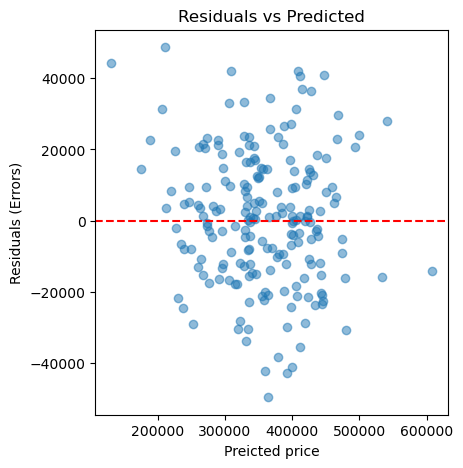

In [14]:
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_pred, residuals,alpha=0.5)
plt.axhline(0, color='red',linestyle='--')
plt.xlabel('Preicted price')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals vs Predicted')

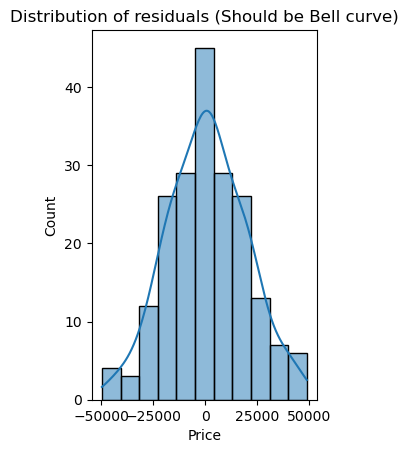

In [15]:
plt.subplot(1,2,2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of residuals (Should be Bell curve)')
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train_scaled)
x_test_poly=poly.transform(x_test_scaled)

poly_model=LinearRegression()
poly_model.fit(x_train_poly,y_train)

y_pred_poly=poly_model.predict(x_test_poly)
r2_poly=r2_score(y_test,y_pred_poly)

print("Linear Model R2:",r2)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predictions already computed:
# y_pred_poly = poly_model.predict(X_test_poly)

# Calculate metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

# Print results
print("Polynomial Model R2:", r2_poly)
print("Polynomial Model MSE:", mse_poly)
print("Polynomial Model RMSE:", rmse_poly)
print("Polynomial Model MAE:", mae_poly)


Linear Model R2: 0.9361512550023611
Polynomial Model R2: 0.9342698937389036
Polynomial Model MSE: 364252579.91510355
Polynomial Model RMSE: 19085.402272813208
Polynomial Model MAE: 15192.093060499674


In [17]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=10)
ridge.fit(x_train_scaled, y_train)
print(f"Ridge R2 Score: {ridge.score(x_test_scaled, y_test):4f}")


Ridge R2 Score: 0.936624


In [20]:
lasso =Lasso(alpha=100)
lasso.fit(x_train_scaled, y_train)
print(f"lasso R2 score: {lasso.score(x_test_scaled, y_test)}")

lasso R2 score: 0.936239268108721


In [22]:
lasso_coefs=pd.Series(lasso.coef_,index=x.columns)
print("\n---Lasso Coefficients---")
print(lasso_coefs)
print("\nNotice :If a coefficient is 0 ,Lasso removed that feature")


---Lasso Coefficients---
Area_SqFt           73386.187031
Bedrooms            14810.397316
House_Age            1206.036393
Distance_to_City   -10545.770865
School_Rating         928.358902
dtype: float64

Notice :If a coefficient is 0 ,Lasso removed that feature


In [24]:
elastic = ElasticNet(alpha=1, l1_ratio=0.5)
elastic.fit(x_train_scaled, y_train)
print(f"\nElasticNet R2 Score: {elastic.score(x_test_scaled,y_test):4f}")


ElasticNet R2 Score: 0.839201
